<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020)</h2>
<h2 align="center">Lab 11: PCA </h2>
<h3 align="center">Eng. Ahmed Wael</h3>

# Import the needed libraries

In [6]:
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
from sklearn.datasets import load_boston, load_digits, load_iris, load_wine
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import cv2
from sklearn.svm import SVR
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

# Last Lab Objectives:

- Understand the differences between supervised and unsupervised learning


- Have a conceptual understanding of PCA


- Understand the PCA drawbacks


- Understand in details the PCA algorithm 


- Understand the difference between Covariance matrix and SVD



- Have a clear idea about the main applications of PCA



- Implement PCA from scratch for Image compression


- Implement PCA from scratch for Data Preprocessing & Visualization


- Use PCA for Regression tasks and compare the perfromance with and without PCA


- Understand the biplot and the screeplot


- Discuss the importance of Feature scaling for PCA



- That's it !!

# Supervised vs Unsupervised Learning

<img src=https://miro.medium.com/max/4096/0*p3zNp9D8YFmX32am.jpg>

# What is PCA?

**Short for Principal Component Analysis**

## How many dimensions we have here?

<img src=https://i.ibb.co/zxpSPCd/1.png>

<img src = https://i.ibb.co/FbdXvMy/1.png>

**What about here?**

<img src=https://i.ibb.co/ypJbfjF/1.png>

**In the first two examples, we can represent the data fully without losing any information with only ONE DIMENSION**

**In the third example, we can represent the data with one dimension but some information will be lost.**

## Another Example of PCA

<img src=https://devopedia.org/images/article/139/9153.1547301619.png>

- The fish's shape is described by 2 variables, height and width


- The two variables are dependent on each other.


- We can get the shape of the fish using only a single **component**. The **Principal** component.

- PCA transforms the two original variables into two orthogonal (independent) components that give a complete alternative description.


- The first component (blue line) will explain most of the variation in the data. 


- The second component (dotted line) will explain the remaining variation.

**PCA Works by finding the direction/line/component that has the least information loss/ the largest variance.**

**The goal of PCA is to reduce the dimensionality of 
the data while keeping the information loss 
minimum**


# PCA drawbacks

<img src=https://devopedia.org/images/article/139/1684.1547301665.jpg>

- PCA assumes that the variabels are linearly correlated. If the correlations is not linear, then PCA will not be as efficient. **a**


- PCA performs **lossy compression**, which means that information is lost when we discard insignificant components. **b**


- Scaling of variables can yield different results. Hence, scaling that you use should be documented. Scaling should not be adjusted to match prior knowledge of data.


- Since each principal components is a linear combination of the original features, visualizations are not easy to interpret or relate to original features

# PCA Algorithm steps:

* Suppose x1,x2, ... , xM are N-dimensional vectors. So, x is an N*M matrix

* So, N is the number of dimensions and M is the number of samples.

1- Compute the data mean:
$$\bar x= \frac{1}{M}\sum_{i=1}^{M}{x_i}$$


2- Subtract mean from each row of X (centering the data)
$$\phi_i = x_i - \bar x$$


3- Form the matrix A 
$$A = [\phi_1 , \phi_2 , ... , \phi_M]   (N*M matrix) $$
then compute the covariance matrix C
$$ C= \frac{1}{M}\sum_{n=1}^{M}{\phi_n \phi_n^T} = A A^T  (N*N matrix)$$


4- Compute the **eigen values** of C. This [video](https://www.youtube.com/watch?v=2fCBE7DWgd0) can refresh your linear algebra.
$$\lambda_1 > \lambda_2 > ... > \lambda_N $$


5- Compute the **eigen vectors** of C 
$$u_1 , u_2 , ... , u_N$$



* **Since C is symmetric, u1, u2, ..., uN form a basis**

* Any vector $$\phi_i = x_i - \bar x$$ can be re-written as a linear combination of the eigenvectors. $$\phi_i = b_1 u_1 + b_2 u_2 + ... + b_N u_N = \sum_{i=1}^{N} b_i u_i $$
$$b = U^T \phi$$

**So, basically, Principal Components = Eigen Vectors. Watch [this](https://www.youtube.com/watch?v=jydawdlGLmo) video for more reference**

6- **Dimensionality Reduction Step**: Keep only the terms corresponding to the K largest eigen values.
$$\sum_{i=1}^{K} b_i u_i$$ Where K<< N

# PCA SVD

**We have computed the eigen values and eigen vectors from the covariance matrix**


**HOWEVER, calculating the covariance matrix by just multiplying the matrix X by its transpose can cause loss of precision and numerical errors**


**Therefore, We should caclulate the covariance matrix using the Singular Value Decomposition technique.**

$$X = USV^T$$

- U: 𝑛×𝑛 orthogonal matrix


- S: diagonal matrix 𝑛×𝑝 matrix



- V: 𝑝×𝑝 orthogonal matrix



- Principle components (PC) are the columns of V


- PC scores are the columns of U



* You can find much more details [here](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)

<img src=https://miro.medium.com/max/700/1*6wkgGgBy2NLVmRVOw8K86w.png>

# Main Applications of PCA:

1 - Image Compression


2 - Preprocessing Step for Classification/Regression/Clustering tasks



3 - Facial Recognision: Eigen Faces
    

4 - Data Visualization




# PCA implementation from scratch ( for image compression)

**How Many Components we have in an 8-bit image**?

Answer: 256

## Implement SVD

In [7]:
def svd(X):
    """

    In the image compression, we assume that each coloum of the image is a feature. Image is the matrix X.
    
    Args: 
        X: N * D array corresponding to an image (N*D*3 if color image)
    Return:
        U: N*N (*3 for color images) 
        S: min(N, D)*1 (*3 for color images)
        V: D*D (*3 for color images)
    """ 
    number_of_dimensions = len(X.shape) ## Get the number of dimensions to decide if it is 2D or 3D
    if number_of_dimensions ==3:
        X = np.transpose(X, (2, 0, 1)) ## Transpose the image for broadcasting
        U, S, V = np.linalg.svd(X, full_matrices=False) ## Apply the SVD
    else:
        U, S, V = np.linalg.svd(X, full_matrices=False) ## Samething but with no broadcasting
    return U,S,V

## Rebuild the K components using SVD

In [8]:
def rebuildsvd(U, S, V, k):
    """
    Rebuild SVD by k componments.
    Args: 
        U: N*N (*3 for color images) 
        S: min(N, D)*1 (*3 for color images)
        V: D*D (*3 for color images)  
        k: int corresponding to number of components
    Return:
        Xrebuild: N*D array of reconstructed image (N*D*3 if color image)
        
    Hint: numpy.matmul may be helpful for reconstructing color images
    """
    
    number_of_dimensions = len(U.shape) ## Get the number of dimensions to decide if it is 2D or 3D
    
    if number_of_dimensions ==3:
        Sigma_new = np.zeros((3, U.shape[1], V.shape[1])) ## Create an empty matrix with size N*D
        for j in range(3):
            np.fill_diagonal(Sigma_new[j, :k, :], S[j, :k]) ## Fid the new matrix diagonal with S
        Xrebuild = np.matmul(U,np.matmul(Sigma_new,V)) ## Perform Matrix Multiplication ( equation in the source)
        Xrebuild = np.transpose(Xrebuild, (0,1,2)) ## Transpose the matrix again to be of size N*D*3
        
    else:
        Xrebuild = np.matrix(U[:, :k]) * np.diag(S[:k]) *np.matrix(V[:k, :]) ## Formula
    return Xrebuild

## What is the compression ratio?

In [9]:
def compression_ratio(X, k):
    """
    Compute compression of an image: (num stored values in compressed)/(num stored values in original)
    Args: 
        X: N * D array corresponding to an image (N * D * 3 if color image)
        k: int corresponding to number of components
    Return:
        compression_ratio: float of proportion of storage used by compressed image
    """
    N = X.shape[0]

    compression_ratio = N/(2*k+1) ## why the 2? and the 1? 
    ##Check http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf
    ## page 12

    return compression_ratio

## How much variance did we perserve?

In [10]:
def recovered_variance_proportion(S, k):
    """
    Compute the proportion of the variance in the original matrix recovered by a rank-k approximation
    
    Args:
       S: min(N, D)*1 (*3 for color images) of singular values for the image
       k: int, rank of approximation
    Return:
       recovered_var: int (array of 3 ints for color image) corresponding to proportion of recovered variance
    """
    number_of_dim = len(S.shape)

    if number_of_dim==1: ## 2D Image
        
        eigenval = S**2/(S.shape[0]-1)  
        significance = [np.abs(i)/np.sum(eigenval) for i in eigenval] ## Get the importance of each eigenvalue
        significance.sort(reverse =True) ## Sort them in a descending order
        recovered_var = sum(significance[0:k]) ## Add them till the k-th componenet
        ## OR
        """
        explained_variance = S**2/(S.shape[0]-1)
        total_var = explained_variance.sum()
        recovered_var = explained_variance / total_var
        explained_variance = explained_variance[:k]
        recovered_var = np.around(np.sum(recovered_var[:k]),decimals = 3)

        """

    else:
        recovered_var = []
        for i in range(3): ## Same as 2D but repeat 3 times, one for each dimension.
            current_eigen_val = S[i,:]**2/(S.shape[1]-1) 
            current_significance = [np.abs(i)/np.sum(current_eigen_val) for i in current_eigen_val]
            current_significance.sort(reverse=True)
            current_recovered_var = sum(current_significance[0:k])
            recovered_var.append(current_recovered_var)

    return recovered_var

## Testing the code

**How many components do we really need?**

### Gray images

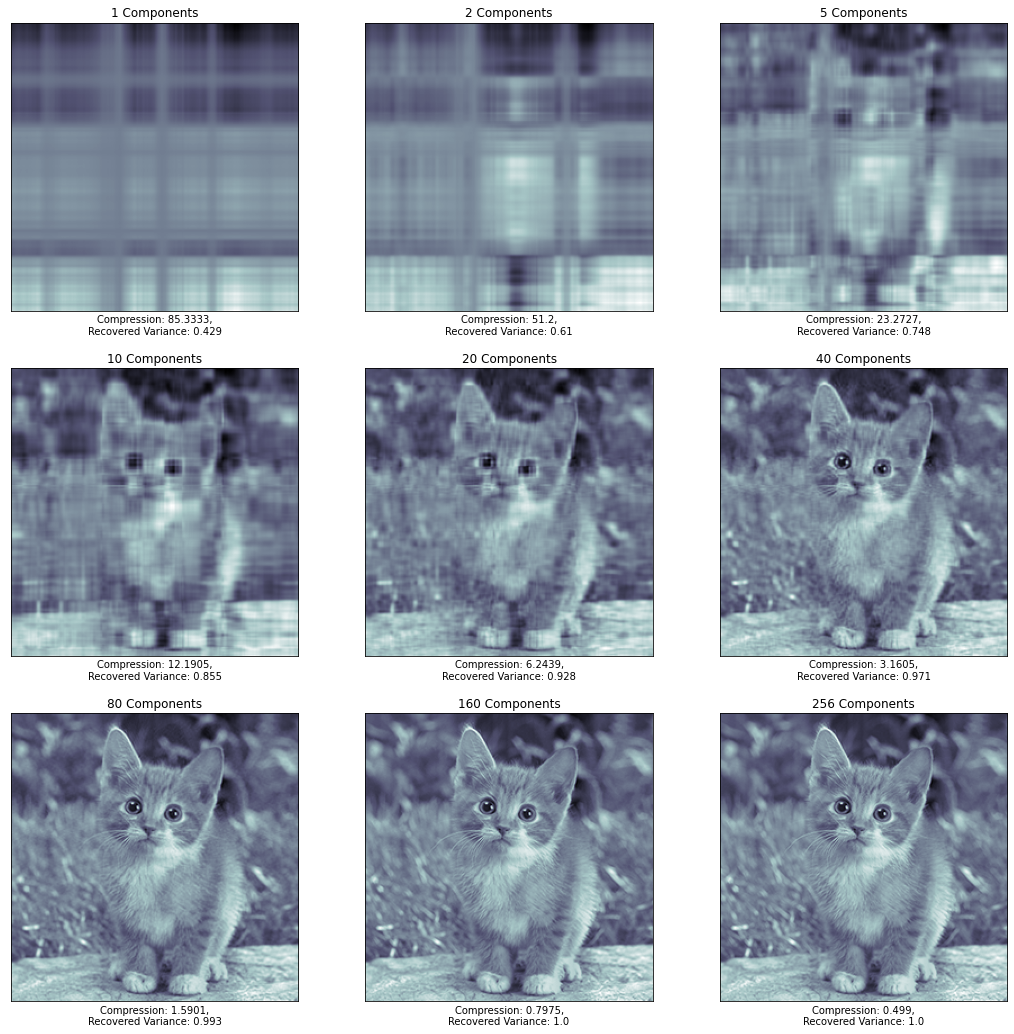

In [11]:
img = plt.imread("cat.jpg")
import cv2
bw_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bw_image_mean = np.mean(bw_image,axis=0)
bw_image -= bw_image_mean

U, S, V = svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]
fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    c = np.around(compression_ratio(bw_image, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1
    

In [13]:
256*256

65536

### Color Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


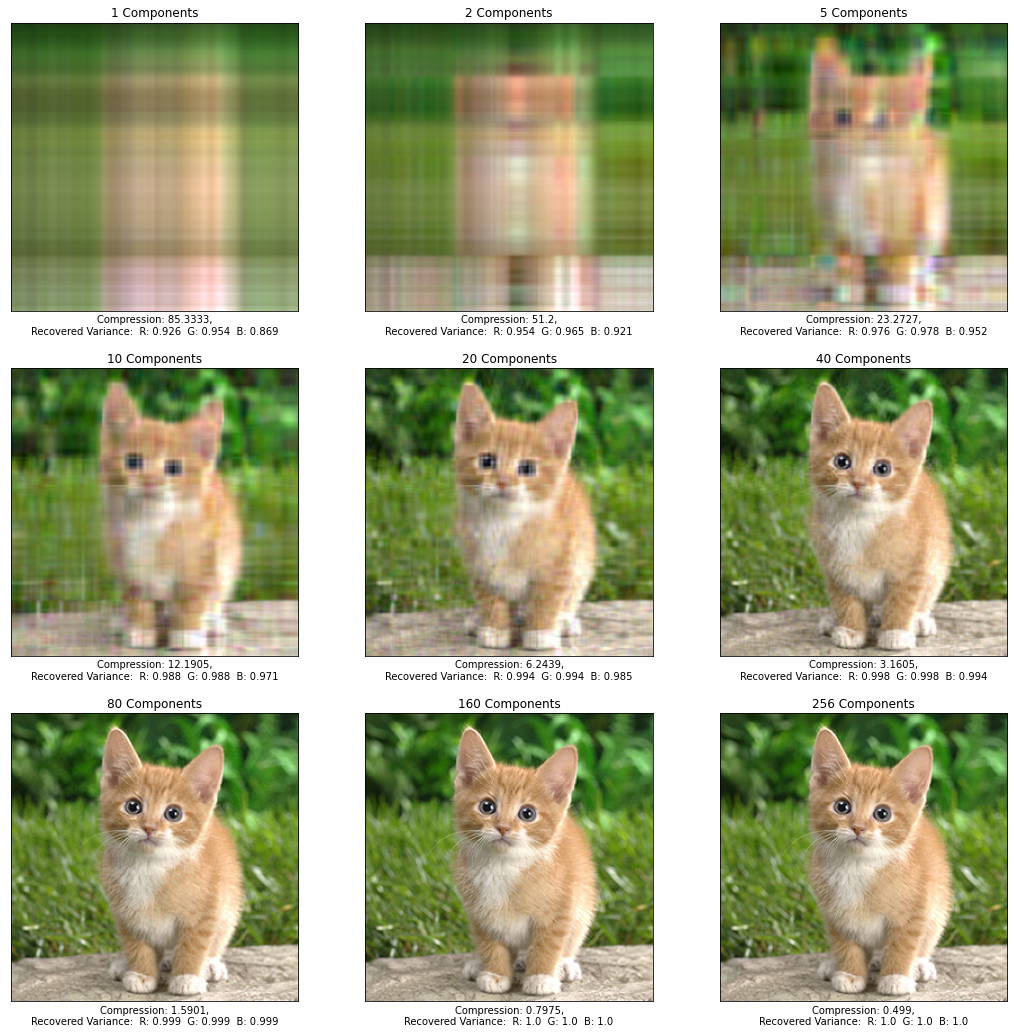

In [7]:
#helper do not need to change

U, S, V = svd(img)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = rebuildsvd(U, S, V, k)
    img_rebuild = np.transpose(img_rebuild, (1, 2, 0))
    c = np.around(compression_ratio(img_rebuild, k), 4)
    r = np.around(recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## Compare our results with Sklearn

In [9]:
img = plt.imread("cat.jpg")
import cv2
bw_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pca_sklearn = PCA(1).fit(bw_image) 
img_transformed = pca_sklearn.transform(bw_image) 
print(img_transformed.shape) 
print(np.sum(pca_sklearn.explained_variance_ratio_) )

(256, 1)
0.42921495


# Implement PCA from Scratch for Data Preprocessing

**Now, let's see how we can use PCA for data preprocessing for classification and regression tasks**


**PCA basic steps:**

In [10]:
def pca(X):
    """
    Decompose dataset into principal components.     
    Args: 
        X: N*D array corresponding to a dataset
    Return:
        U: N*N 
        S: min(N, D)*1 
        V: D*D
    """
    mean = (np.mean(X,axis = 0)) ## Center the data ( VERY IMPORTANT)
    mean = mean.astype('int') ## Avoid type cast errors
    X -= mean ## Subtract the mean
    U,S,V = svd(X) ## Perform SVD
    return U,S,V

**Intrinsic Dimensionality**

- If we have a dataset that contains N samples and D features with D << N. 


- We may have many of the features containing redundent information


- The *intrinsic dimensionality* is the number of dimensions we need to reconstruct our data with high fidelity


- We need to define this number -percentage ourself. It can correspond to the the number of PCs needed to reconstruct 98% of the data variance for example.

- We define a set of features as linearly independent in $z$ space if we cannot construct one out of a linear combination of the others in $z$ space.


- The number of linearly independent features in $z$ space is equal to the number of nonzero eigenvalues (where we define 0 is anything less than $10^{-9}$ due to floating point error).


- Zero eigenvalues mean that the corresponding feature is dependent of other features according to the matrix rank definition.

In [29]:
def intrinsic_dimension(S, recovered_variance=.98):
    """
    Find the number of principal components necessary to recover given proportion of variance
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
        
        recovered_varaiance: float in [0,1].  Minimum amount of variance 
            to recover from given principal components
    Return:
        dim: int, the number of principal components necessary to recover 
            the given proportion of the variance
    """
    eigenval = S**2/(S.shape[0]-1) ## Same as in part 1
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse =True)
    
    total_var = 0 
    dim = 0
    i = 0
    while total_var <= recovered_variance: ## Loop over the significance util met the required variance
        total_var += significance[dim]
        dim +=1
    i +=1
    return dim

In [30]:
def num_linearly_ind_features(S, eps=1e-11):
    """
    Find the number of linearly independent features in dataset
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
    Return:
        dim: int, the number of linearly independent dimensions in our data
    """
    eigenval = S**2/(S.shape[0]-1)
    dim = len([i for i in eigenval if i >= eps]) ## Find all eigen values that have more than the threshold
    return dim

# Apply PCA on Data for Regression

In [31]:
data_boston=load_boston(return_X_y=True)
X=data_boston[0]
y=data_boston[1]
X.shape

(506, 13)

In [32]:
#apply PCA on the dataset and also find the number of linearly independent and intrinsic components 
def apply_PCA_on_data(X):
    """
      Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  Return:
  X_pca: pca reduced dataset
  independent_features: number of independent features 
  intrinsic_dimensions: number of intrinsic dimensions
    """
    U,S,V = pca(X)
    intrinsic_dimensions = intrinsic_dimension(S) ## call functions 
    independent_features = num_linearly_ind_features (S)
    x_pca = U[:, :intrinsic_dimensions] * S[:intrinsic_dimensions]
    return x_pca, independent_features , intrinsic_dimensions

In [33]:
X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X)
print("data shape with PCA ",X_PCA.shape)
print("Number of independent features ",ind_features)
print("Number of intrinsic components ",intrinsic_dimensions)


data shape with PCA  (506, 3)
Number of independent features  13
Number of intrinsic components  3


In [34]:
#get training and testing data 
X_train , X_test , y_train, y_test = train_test_split(X_PCA,y , test_size = 0.2 , random_state=42)

In [35]:
#use SVR for getting predcited labels
clf = SVR()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#calculate MSE 
mse_score = mean_squared_error(y_pred, y_test)
print("MSE score with PCA",mse_score)

MSE score with PCA 51.20011782090749


## SVM Regression without PCA

In [36]:
#Ridge regression without PCA
#get training and testing data 
X_train , X_test , y_train, y_test = train_test_split(X ,y , test_size = 0.2 , random_state=42)
#use Ridge Regression for getting predcited labels
clf = SVR()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
#calculate RMSE 
rmse_score = mean_squared_error(y_pred, y_test)
print("MSE score without PCA",rmse_score)

MSE score without PCA 49.37799345969089


# Use PCA for Data Visualization

In [37]:
def visualize(X,y):
    """
  Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  y: numpy array (N,), the true labels
  
  Return:
  retained variance: scalar
  """
    U,S,V = pca(X) ## Perform PCA
    eigenval = S**2/(X.shape[0]-1) ## Same as before
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse =True)
    recovered_var = sum(significance[0:2]) ## Till second dimension as we want to visualize it !
    
    reduced_data = U[:, :2] * S[:2]  ## The restored data
    colors = ['r','b','y']
    plt.figure(figsize=(8,5))
    for color, i in zip(colors, [0, 1, 2]):
        plt.scatter(reduced_data[y == i, 0], reduced_data[y == i, 1],marker='x', color=color, alpha=.8,lw=2)
    plt.show()
    return recovered_var

## Use PCA for visualization of iris and wine data


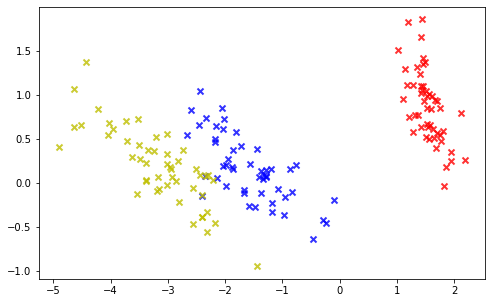

Retained variance for iris dataset  0.9774907426943391


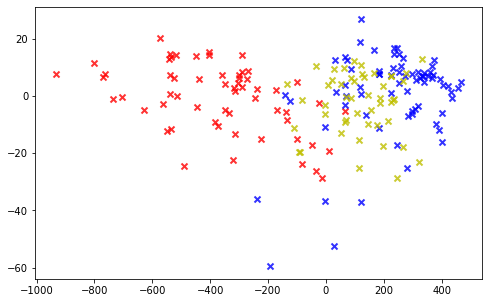

Retained variance for wine dataset  0.9998036218658357


In [38]:
data_iris=load_iris(return_X_y=True)
X=data_iris[0]
y=data_iris[1]
retained_variance_for_iris=visualize(X,y)
print("Retained variance for iris dataset ",retained_variance_for_iris)

data_wine=load_wine(return_X_y=True)
X=data_wine[0]
y=data_wine[1]
retained_variance_for_wine=visualize(X,y)
print("Retained variance for wine dataset ",retained_variance_for_wine)

## Visualize the Digit Dataset After reduction

0.2850936482369867


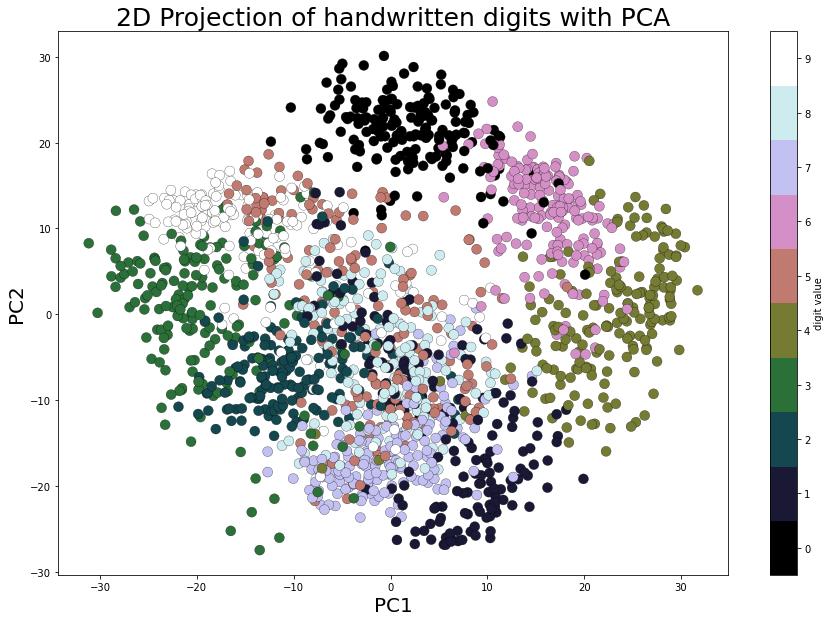

In [48]:
digits = load_digits() 

pca_digits=PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data) 
print(np.sum(pca_digits.explained_variance_ratio_))
plt.figure(figsize=(15,10))
plt.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, c=digits.target, edgecolor='k',  s=100, cmap=plt.cm.get_cmap('cubehelix', 10))
plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('2D Projection of handwritten digits with PCA', size=25)
plt.colorbar(ticks=range(10), label='digit value')
plt.clim(-0.5, 9.5)

# Us Arrest Dataset

In [15]:
df = pd.read_csv("USArrests.csv")
names = df['Unnamed: 0']
df.drop(labels="Unnamed: 0",axis=1,inplace=True)
X = df

This data set contains statistics, in arrests per 100,000 residents
for assault, murder, and rape in each of the 50 US states in 1973.
Also given is the percent of the population living in urban areas.

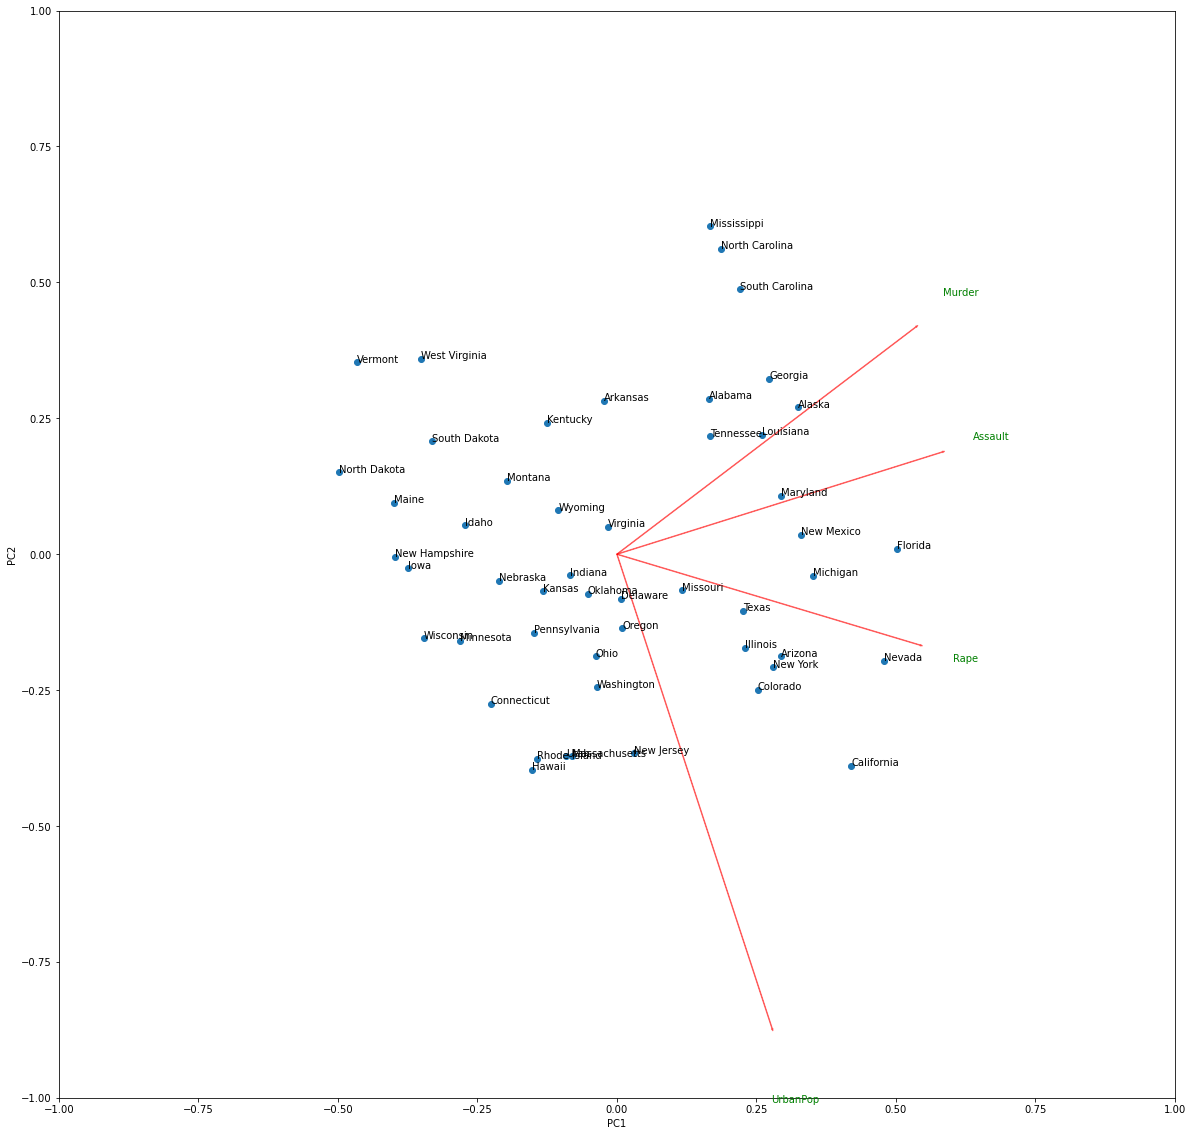

In [16]:
# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca_sklearn = PCA()
x_new = pca_sklearn.fit_transform(X)

def biplot(score,coeff,names,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()

    ax.scatter(xs * scalex,ys * scaley)
    for i, txt in enumerate(names):
        ax.annotate(txt, (xs[i] * scalex, ys[i] * scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))

#Call the function. Use only the 2 PCs.
biplot(x_new[:,0:2],np.transpose(pca_sklearn.components_[0:2, :]),names,labels = list(df.columns))
plt.show()

# Feature Scaling Effect on PCA

- Principal component analysis is not robust to the scale of the features.  


- Measuring a feature with different units can change the principal components.

**To see the effect of Feature scaling, we randomly choose one column in each of the above datasets and multiply it by 1000**

In [43]:
def randomly_perturb_data(data, multiplier=1000):
    """
    Multiply a random column in data by multiplier
    
    Inputs:
        data: N*D numpy array of features
        multiplier: multiplier by which to perturb a random column in data
        
    Returns:
        perturbed_data: Data with random column multiplied by multiplier
    """
    D = data.shape[1] 
    random_col = np.random.randint(D)  ## Choose random index
    perturbed_data = data
    perturbed_data[:,random_col] = perturbed_data[:,random_col]*multiplier ## mutliply the values in this index by a multiplier
    return perturbed_data
   
def scree_plot(X, n_components=10):
    """
    Plot proportion of variance contained in each individual component
    """
    U,S,V = pca(X)
    eigenval = S**2/(X.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse =True)    
    fig = plt.figure(figsize=(8,5))
    plt.plot(list(range(1,len(significance)+1)),np.cumsum(significance))

    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()
    
def plot_component_vector(X):
    U,S,V = pca(X)
    eigenval = S**2/(X.shape[0]-1)
    significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
    significance.sort(reverse =True)    
    fig = plt.figure(figsize=(8,5))
    plt.bar(list(range(len(significance))),significance)
    plt.title('Component Vector Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.show()

In [44]:
data_iris=load_iris(return_X_y=True)
X_iris=data_iris[0]
y_iris=data_iris[1]
data_wine = load_wine(return_X_y=True)
X_wine = data_wine[0]
y_wine = data_wine[1]
data_boston=load_boston(return_X_y=True)
X_boston=data_boston[0]
y_boston=data_boston[1]

data_iris_m=load_iris(return_X_y=True)
X_iris_m=data_iris_m[0]
y_iris_m=data_iris_m[1]
data_wine_m = load_wine(return_X_y=True)
X_wine_m = data_wine_m[0]
y_wine_m = data_wine_m[1]
data_boston_m=load_boston(return_X_y=True)
X_boston_m=data_boston[0]
y_boston_m=data_boston[1]

## Apply PCA on all data with and without multiplication

Independent Features and Intrinsic Dimensions with no Multiplication for Iris dataset  4 3
Independent Features and Intrinsic Dimensions after Multiplication for Iris dataset    4 1

Scree plot and Component Vector with No Multiplication


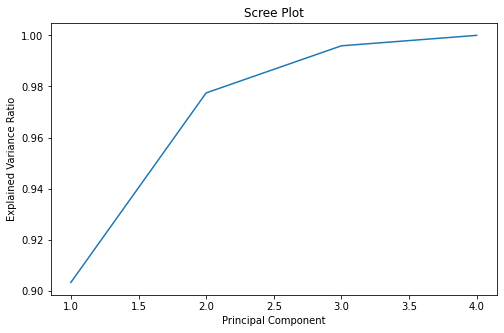

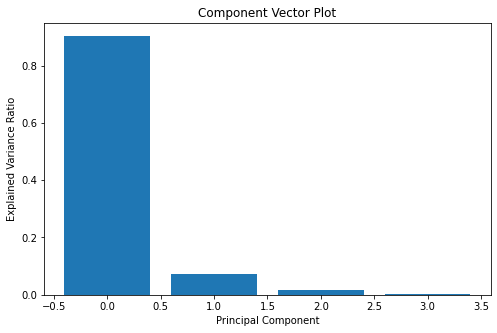

Scree plot and Component Vector with Multiplication


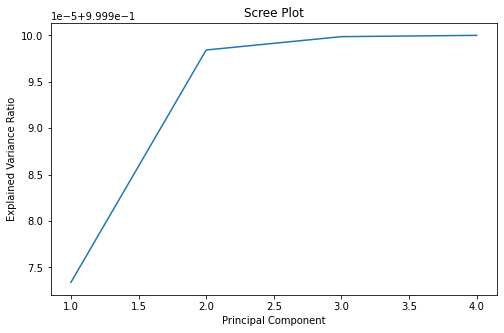

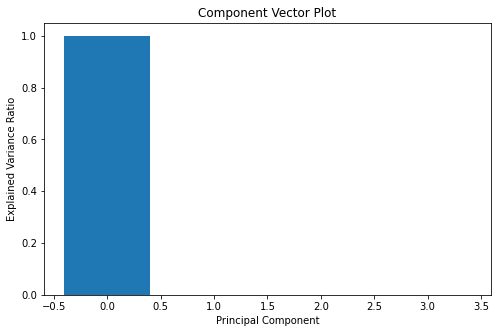

In [45]:
_, ind_features_iris, intrinsic_dimensions_iris = apply_PCA_on_data(X_iris)
X_iris_m = randomly_perturb_data(X_iris_m)
_, ind_features_iris_m, intrinsic_dimensions_iris_m = apply_PCA_on_data(X_iris_m)
print("Independent Features and Intrinsic Dimensions with no Multiplication for Iris dataset ",ind_features_iris,intrinsic_dimensions_iris)
print("Independent Features and Intrinsic Dimensions after Multiplication for Iris dataset   ",ind_features_iris_m,intrinsic_dimensions_iris_m)
print("\nScree plot and Component Vector with No Multiplication")
scree_plot(X_iris)
plot_component_vector(X_iris)
print("Scree plot and Component Vector with Multiplication")
scree_plot(X_iris_m)
plot_component_vector(X_iris_m)

Independent Features and Intrinsic Dimensions with no Multiplication for Last dataset  13 3
Independent Features and Intrinsic Dimensions after Multiplication for Last dataset    13 1

Scree plot and Component Vector with No Multiplication


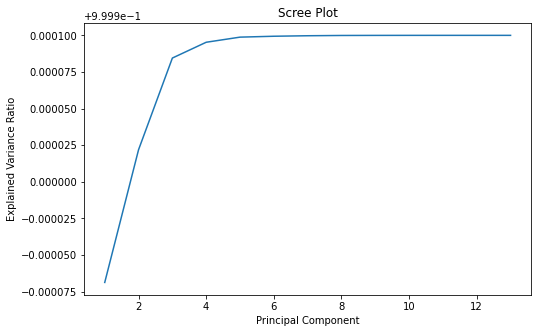

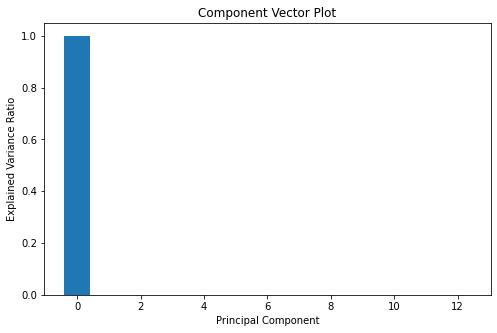

Scree plot and Component Vector with Multiplication


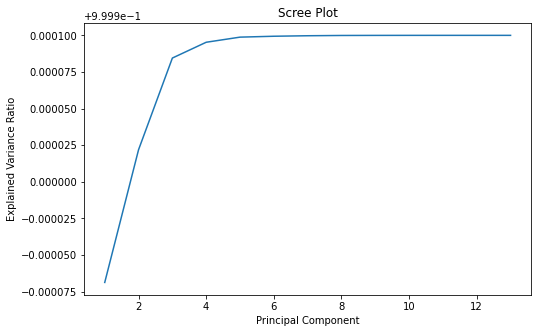

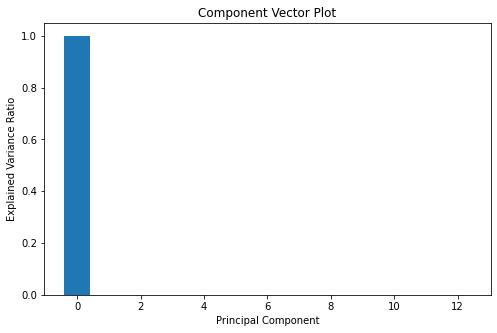

In [47]:
_, ind_features_npy, intrinsic_dimensions_npy = apply_PCA_on_data(X_boston)
X_npy_m = randomly_perturb_data(X_boston_m)
_, ind_features_npy_m, intrinsic_dimensions_npy_m = apply_PCA_on_data(X_boston_m)
print("Independent Features and Intrinsic Dimensions with no Multiplication for Last dataset ",ind_features_npy,intrinsic_dimensions_npy)
print("Independent Features and Intrinsic Dimensions after Multiplication for Last dataset   ",ind_features_npy_m,intrinsic_dimensions_npy_m)
print("\nScree plot and Component Vector with No Multiplication")
scree_plot(X_boston)
plot_component_vector(X_boston)
print("Scree plot and Component Vector with Multiplication")
scree_plot(X_npy_m)
plot_component_vector(X_npy_m)

## Sources

https://iq.opengenus.org/applications-of-pca/
 http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf
 https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

https://arxiv.org/pdf/1404.1100.pdf


# Task

- Just follow [this](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/) tutorial on Eigenfaces.

- The code can be found [here](https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter09/Chapter9.ipynb)

- 3 Points for documenting your code and explaining each step in your own words.

- 7 Points for the working code.